In [22]:
from sklearn import preprocessing

from dataset import *
from models.base_model import *
from models.neural_net import *
from models.sampled_net import *
from viewer.visualisator import *
from logic import *
import dataset
import models.base_model
import models.neural_net
import models.sampled_net
import viewer.visualisator
import logic

import importlib
from sklearn.pipeline import Pipeline
from swimnetworks import Dense, Linear

importlib.reload(dataset)
importlib.reload(models.base_model)
importlib.reload(models.neural_net)
importlib.reload(models.sampled_net)
importlib.reload(viewer.visualisator)
importlib.reload(logic)

<module 'logic' from 'c:\\Users\\daydo\\OneDrive\\Dokumente\\sampled-networks\\logic.py'>

In [23]:
xd = 2  # Input space dimensions
yd = 4  # Output dimension
num_samples = 1000  # Number of data points
epochs = 100  # Number of training epochs
l = [200]  # Number of neurons in each layer


dataset = Dataset()
dataset.create_dataset_Barron(xd, num_samples)
dataset.scale(preprocessing.MinMaxScaler())
dataset.split_train_test(0.2)

In [24]:
steps = [
    (
        "dense",
        Dense(
            layer_width=512, activation="relu", parameter_sampler="relu", random_seed=42
        ),
    ),
    ("linear", Linear(regularization_scale=1e-10)),
]
model = Pipeline(steps)

model.fit(dataset.X_train, dataset.y_train)

model_s = SampledNet()
model_s.weights = [
    model.get_params()["steps"][0][1].weights,
    model.get_params()["steps"][1][1].weights,
]
model_s.biases = [
    -model.get_params()["steps"][0][1].biases[0],
    -model.get_params()["steps"][1][1].biases[0],
]


ysampled = model_s.predict(dataset.X_train)
print(loss_mse(ysampled, dataset.y_train))

yswim = model.predict(dataset.X_train)
print(loss_mse(yswim, dataset.y_train))

# model.transform(dataset.X_test)

3.859382993663325e-06
3.859382993663325e-06


Layer1 sampling: 100%|██████████| 512/512 [00:00<00:00, 5358.30it/s]


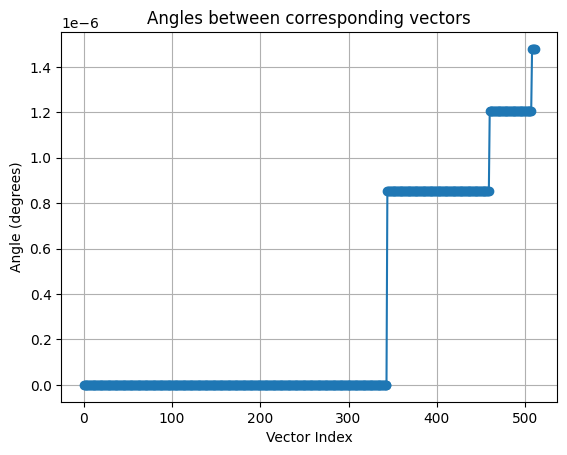

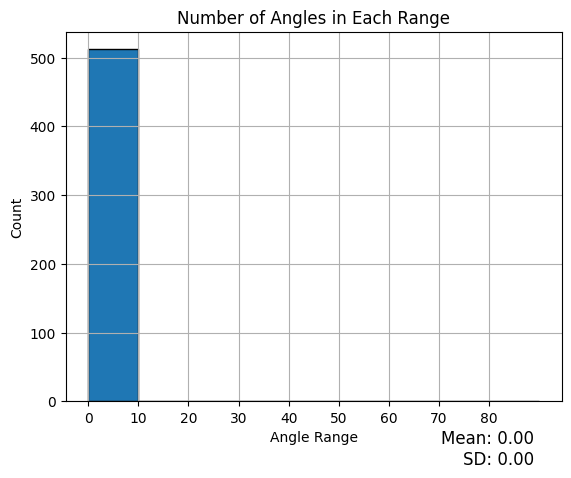

In [25]:
weights_l1, biases_l1 = compute_weights_biases_layer1(dataset.X_train, dataset.y_train, model_s.weights, model_s.biases)
weights_l2, biases_l2 = compute_weights_biases_layer2_classic(dataset.X_train, dataset.y_train, model_s.weights, model_s.biases, weights_l1, biases_l1)

# print(biases)
# print(model_s.biases[0])
plot_vector_differences(np.transpose(weights_l1), np.transpose(model_s.weights[0]))

In [35]:
weights_l2, biases_l2 = compute_weights_biases_layer2_classic(dataset.X_train, dataset.y_train, model_s.weights, model_s.biases, weights_l1, biases_l1)

model_s_new= SampledNet()
model_s_new.weights=[weights_l1, weights_l2]
model_s_new.biases=[biases_l1, biases_l2]
print(model_s_new.biases[1]-model_s.biases[1])

[0.]
